In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("encoded_loan_prediction.csv")

# Display the first few rows of the dataset to understand its structure
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [2]:
#Information gain
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Extracting features and target
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

# Compute the information gain of each feature
infovariable = mutual_info_classif(X, y)

# Create a DataFrame for the Information Gain scores
infovariable = pd.DataFrame({
    'Feature': X.columns,
    'Information_Gain': infovariable
})

# Sort the DataFrame based on the Information Gain scores
infovariable = info_gain_df.sort_values(by='Information_Gain', ascending=False)

infovariable


,Feature,Information_Gain
9,Credit_History,0.127957
5,ApplicantIncome,0.020880
3,Education,0.006965
10,Property_Area,0.006313
4,Self_Employed,0.004181
1,Married,0.000048
0,Gender,0.000000
2,Dependents,0.000000
6,CoapplicantIncome,0.000000
7,LoanAmount,0.000000


In [3]:
# univariate 
from sklearn.feature_selection import f_classif

# Compute the Fisher Score (F-values) for each feature
f_values, _ = f_classif(X, y)

# Create a DataFrame for the Fisher Scores
fisher_score_df = pd.DataFrame({
    'Feature': X.columns,
    'Fisher_Score': f_values
})

# Sort the DataFrame based on the Fisher Scores
fisher_score_df = fisher_score_df.sort_values(by='Fisher_Score', ascending=False)

fisher_score_df


,Feature,Fisher_Score
9,Credit_History,252.652090
1,Married,5.164552
3,Education,4.547685
7,LoanAmount,0.709020
6,CoapplicantIncome,0.676818
10,Property_Area,0.631733
8,Loan_Amount_Term,0.311334
0,Gender,0.198059
5,ApplicantIncome,0.066994
2,Dependents,0.062665


In [4]:
#Fisher Score
from sklearn.metrics import roc_auc_score

# Compute the ROC/AUC for each feature
roc_auc_scores = [roc_auc_score(y, X[col]) for col in X.columns]

# Create a DataFrame for the ROC/AUC scores
roc_auc_df = pd.DataFrame({
    'Feature': X.columns,
    'ROC_AUC': roc_auc_scores
})

# Sort the DataFrame based on the ROC/AUC scores
roc_auc_df = roc_auc_df.sort_values(by='ROC_AUC', ascending=False)

roc_auc_df


,Feature,ROC_AUC
9,Credit_History,0.705248
1,Married,0.546961
6,CoapplicantIncome,0.525560
10,Property_Area,0.517458
0,Gender,0.507492
2,Dependents,0.504968
5,ApplicantIncome,0.498976
4,Self_Employed,0.498642
8,Loan_Amount_Term,0.489509
7,LoanAmount,0.480993


In [5]:
# Wrapper
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the RandomForest classifier and desired number of features to select
rfe = RFE(estimator=rf, n_features_to_select=1, step=1)

# Fit RFE
rfe = rfe.fit(X, y)

# Create a DataFrame for the RFE rankings
rfe_ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'RFE_Ranking': rfe.ranking_
})

# Sort the DataFrame based on the RFE rankings
rfe_ranking_df = rfe_ranking_df.sort_values(by='RFE_Ranking')

rfe_ranking_df


,Feature,RFE_Ranking
5,ApplicantIncome,1
7,LoanAmount,2
9,Credit_History,3
6,CoapplicantIncome,4
8,Loan_Amount_Term,5
2,Dependents,6
10,Property_Area,7
1,Married,8
3,Education,9
0,Gender,10


In [6]:
# Merge the rankings
#Combined Rank=Information Gain Rank+Fisher Score Rank+ROC/AUC Ra
combined_df = info_gain_df.merge(fisher_score_df, on='Feature').merge(roc_auc_df, on='Feature').merge(rfe_ranking_df, on='Feature')

# Calculate the combined rank
combined_df['Combined_Rank'] = combined_df['Information_Gain'].rank() + combined_df['Fisher_Score'].rank() + combined_df['ROC_AUC'].rank() + combined_df['RFE_Ranking']

# Sort by combined rank
combined_df = combined_df.sort_values(by='Combined_Rank')

combined_df[['Feature', 'Combined_Rank']]


,Feature,Combined_Rank
9,LoanAmount,15.0
10,Loan_Amount_Term,16.0
7,Dependents,17.0
1,ApplicantIncome,19.0
4,Self_Employed,23.0
8,CoapplicantIncome,23.0
6,Gender,24.0
2,Education,28.0
3,Property_Area,29.0
5,Married,34.0


In [7]:
# LoanAmount, ApplicantIncome, and Loan_Amount_Term

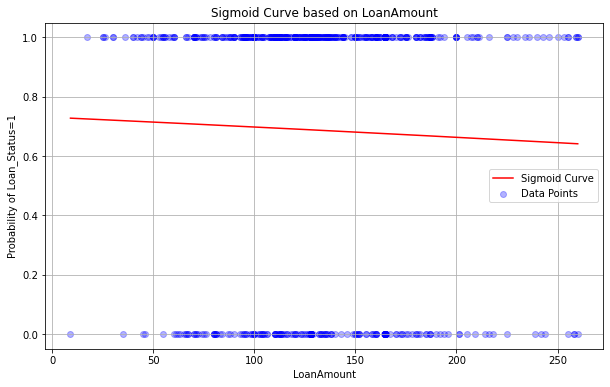

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Extract the top-ranked feature
top_feature = X['LoanAmount'].values.reshape(-1, 1)

# Fit a logistic regression model
clf = LogisticRegression()
clf.fit(top_feature, y)

# Predict probabilities
X_test = np.linspace(top_feature.min(), top_feature.max(), 300)
y_prob = clf.predict_proba(X_test.reshape(-1, 1))[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(top_feature, y, color='blue', alpha=0.3, label='Data Points')
plt.plot(X_test, y_prob, color='red', label='Sigmoid Curve')
plt.title('Sigmoid Curve based on LoanAmount')
plt.xlabel('LoanAmount')
plt.ylabel('Probability of Loan_Status=1')
plt.legend()
plt.grid(True)
plt.show()


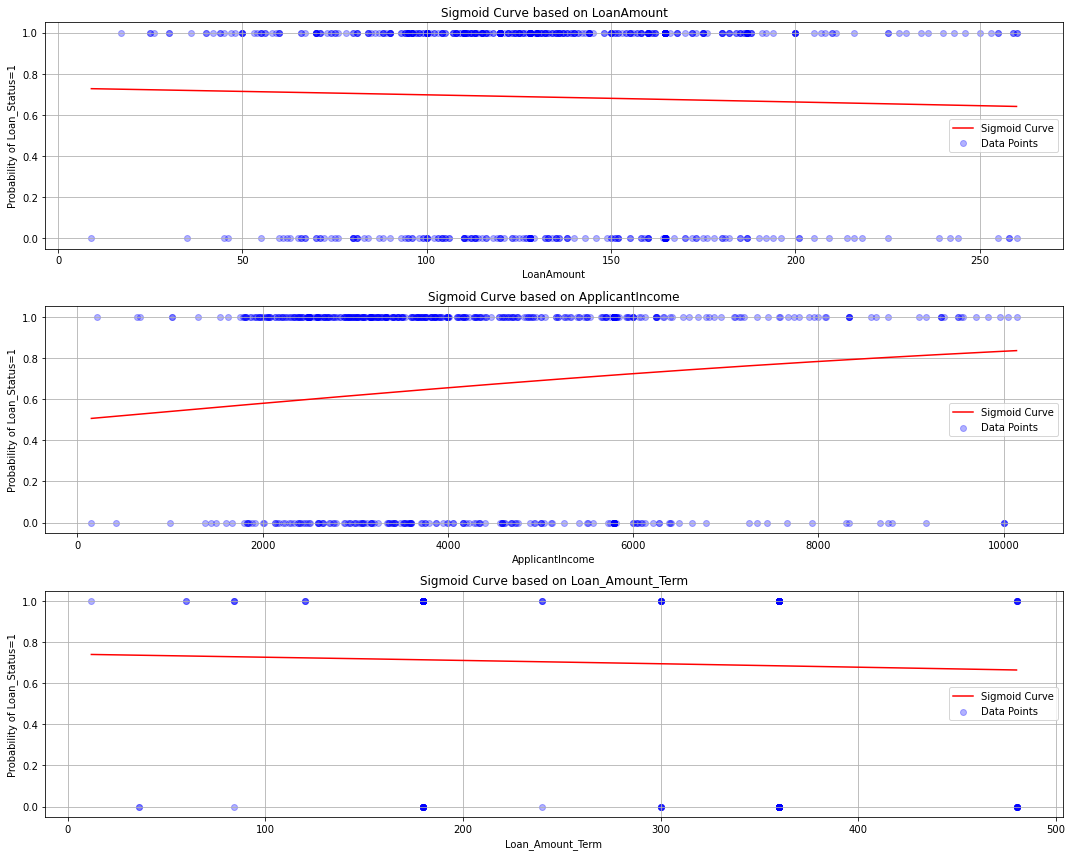

In [9]:
# List of selected features
features = ['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term']

# Initialize logistic regression model
clf = LogisticRegression()

# Plot for each feature
plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    X_feature = X[feature].values.reshape(-1, 1)
    
    # Fit the model
    clf.fit(X_feature, y)
    
    # Predict probabilities
    X_test = np.linspace(X_feature.min(), X_feature.max(), 300)
    y_prob = clf.predict_proba(X_test.reshape(-1, 1))[:, 1]
    
    # Plotting
    plt.subplot(3, 1, i)
    plt.scatter(X_feature, y, color='blue', alpha=0.3, label='Data Points')
    plt.plot(X_test, y_prob, color='red', label='Sigmoid Curve')
    plt.title(f'Sigmoid Curve based on {feature}')
    plt.xlabel(feature)
    plt.ylabel('Probability of Loan_Status=1')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.show()


In [10]:
# Logistic REgression

In [11]:
from sklearn.model_selection import train_test_split

# Select the features
X_selected = df[['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((491, 3), (123, 3))

In [12]:
from sklearn.model_selection import GridSearchCV
import time

# Initialize logistic regression model
logreg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV with 5-fold cross validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Start the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Compute the time taken for grid search
time_taken = end_time - start_time

best_params = grid_search.best_params_
best_params, time_taken


({'C': 0.001, 'penalty': 'l1'}, 0.2707202434539795)

In [13]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

# Train the model using the best parameters
best_logreg = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver='liblinear')
best_logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = best_logreg.predict(X_test)
y_prob = best_logreg.predict_proba(X_test)[:, 1]

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

accuracy, f1, roc_auc


(0.6504065040650406, 0.7881773399014779, 0.44011627906976747)

In [14]:
# # SVM 

# from sklearn.svm import SVC

# # Initialize the SVM classifier
# svm = SVC(probability=True)  # 'probability=True' to ensure we can get predicted probabilities for ROC-AUC

# # Define the hyperparameters and their possible values
# param_grid_svm = {
#     'C': [0.001, 0.01, 0.1, 1,],
#     'kernel': ['linear', 'rbf'],
#     'gamma': [ 'auto']
# }

# # Initialize GridSearchCV with 5-fold cross validation
# grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', return_train_score=True)

# # Start the grid search
# start_time_svm = time.time()
# grid_search_svm.fit(X_train, y_train)
# end_time_svm = time.time()

# # Compute the time taken for grid search
# time_taken_svm = end_time_svm - start_time_svm

# best_params_svm = grid_search_svm.best_params_
# best_params_svm, time_taken_svm


In [15]:
# # Update the hyperparameters grid as per user's request
# from sklearn.svm import SVC
# svm = SVC(probability=True)  # 'probability=True' to ensure we can get predicted probabilities for ROC-AUC
# param_grid_svm_updated = {
#     'C': [0.001, 0.01,],
#     'kernel': ['linear'],
#     'gamma': ['auto']
# }

# # Re-run GridSearchCV for SVM with the updated hyperparameter grid
# grid_search_svm_updated = GridSearchCV(svm, param_grid_svm_updated, cv=5, scoring='accuracy', return_train_score=True)
# grid_search_svm_updated.fit(X_train, y_train)

# # Retrieve the best parameters from the updated grid search
# best_params_svm_updated = grid_search_svm_updated.best_params_
# best_params_svm_updated


In [16]:
    # Regularization Strength (CC): 0.001
    # Kernel: linear
    # Gamma: auto

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM classifier with specified parameters
svm_classifier = SVC(C=0.001, kernel='linear', gamma='auto')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on training data
train_predictions = svm_classifier.predict(X_train)

# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, train_predictions)

train_accuracy


0.6965376782077393

In [18]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Calculate mean and standard deviation of CV scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std


(0.6965367965367966, 0.0039579468150896776)

In [19]:
import time
from sklearn.metrics import f1_score, roc_auc_score

# Measure the computational time for predictions on test data
start_time = time.time()
test_predictions = svm_classifier.predict(X_test)
end_time = time.time()

# Calculate the required metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_predictions)

# Time taken for predictions
time_taken = end_time - start_time

test_accuracy, test_f1_score, test_roc_auc, time_taken


(0.6504065040650406, 0.7881773399014779, 0.5, 0.0)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

best_params


{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [21]:
# Use the best estimator from the grid search for cross-validation
cv_scores_dt = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)

# Calculate mean and standard deviation of CV scores for Decision Tree
cv_mean_dt = cv_scores_dt.mean()
cv_std_dt = cv_scores_dt.std()

cv_mean_dt, cv_std_dt


(0.7067408781694496, 0.014535848893275057)

In [22]:
# Measure the computational time for predictions on test data using Decision Tree
start_time_dt = time.time()
test_predictions_dt = grid_search.best_estimator_.predict(X_test)
end_time_dt = time.time()

# Calculate the required metrics for Decision Tree
test_accuracy_dt = accuracy_score(y_test, test_predictions_dt)
test_f1_score_dt = f1_score(y_test, test_predictions_dt)
test_roc_auc_dt = roc_auc_score(y_test, test_predictions_dt)

# Time taken for predictions using Decision Tree
time_taken_dt = end_time_dt - start_time_dt

test_accuracy_dt, test_f1_score_dt, test_roc_auc_dt, time_taken_dt


(0.6178861788617886, 0.7638190954773869, 0.475, 0.0018646717071533203)

In [27]:
# Add Logistic Regression results to the dataframe
metrics_df.loc['Logistic Regression'] = [0.6504065040650406, 0.7881773399014779, 0.44011627906976747, 0.2707202434539795]

# Plotting the performance metrics with Logistic Regression included
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Accuracy
metrics_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], ylim=(0, 1))
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].grid(axis='y')

# Plot for F1-Score
metrics_df['F1-Score'].plot(kind='bar', ax=axes[0, 1], ylim=(0, 1))
axes[0, 1].set_title('F1-Score')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].grid(axis='y')

# Plot for ROC-AUC Score
metrics_df['ROC-AUC Score'].plot(kind='bar', ax=axes[1, 0], ylim=(0, 1))
axes[1, 0].set_title('ROC-AUC Score')
axes[1, 0].set_ylabel('ROC-AUC Score')
axes[1, 0].grid(axis='y')

# Plot for Computation Time
metrics_df['Computation Time (sec)'].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Computation Time')
axes[1, 1].set_ylabel('Time (seconds)')
axes[1, 1].grid(axis='y')

plt.tight_layout()
plt.show()


ValueError: cannot set a row with mismatched columns

In [28]:
# Create a dataframe to represent the performance metrics and computation time
metrics_df = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree'],
    'Accuracy': [test_accuracy, test_accuracy_dt],
    'F1-Score': [test_f1_score, test_f1_score_dt],
    'ROC-AUC Score': [test_roc_auc, test_roc_auc_dt],
    'Computation Time (sec)': [time_taken, time_taken_dt]
})

metrics_df


,Model,Accuracy,F1-Score,ROC-AUC Score,Computation Time (sec)
0,SVM,0.650407,0.788177,0.500,0.000000
1,Decision Tree,0.617886,0.763819,0.475,0.001865


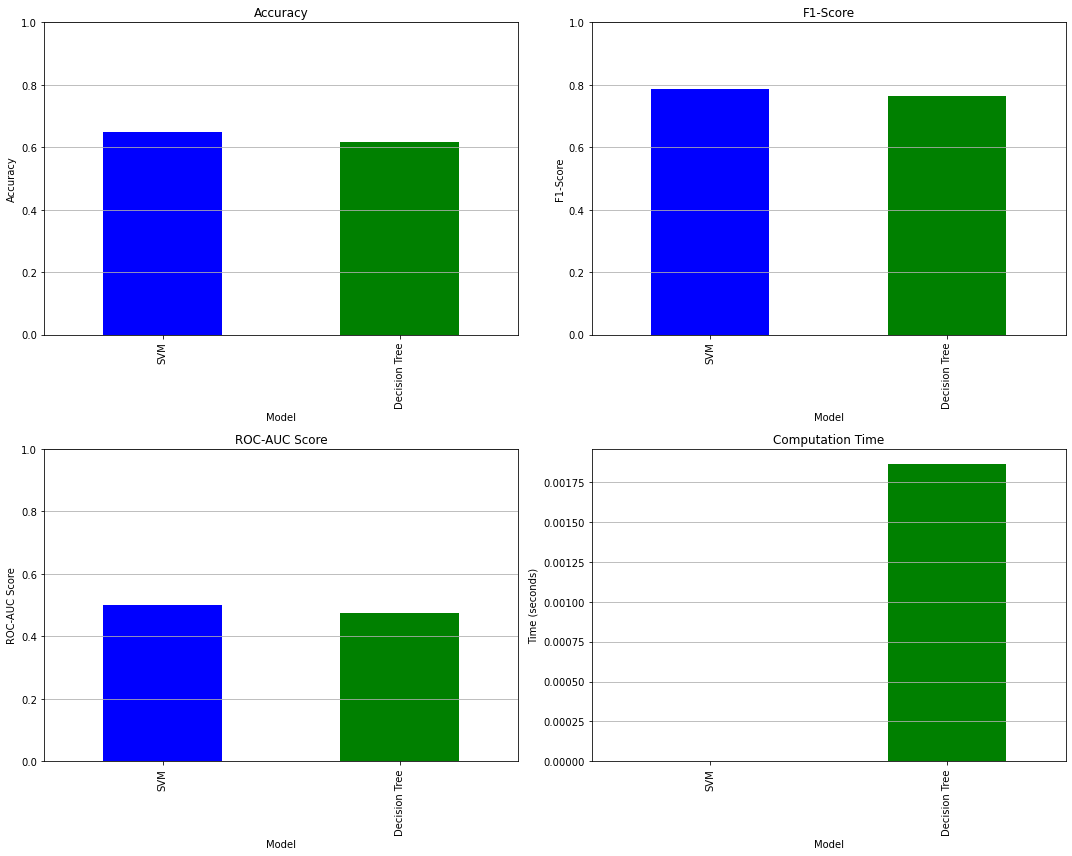

In [29]:
import matplotlib.pyplot as plt

# Set the model names as index for better visualization in bar plots
metrics_df.set_index('Model', inplace=True)

# Plotting the performance metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Accuracy
metrics_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], color=['blue', 'green'], ylim=(0, 1))
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].grid(axis='y')

# Plot for F1-Score
metrics_df['F1-Score'].plot(kind='bar', ax=axes[0, 1], color=['blue', 'green'], ylim=(0, 1))
axes[0, 1].set_title('F1-Score')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].grid(axis='y')

# Plot for ROC-AUC Score
metrics_df['ROC-AUC Score'].plot(kind='bar', ax=axes[1, 0], color=['blue', 'green'], ylim=(0, 1))
axes[1, 0].set_title('ROC-AUC Score')
axes[1, 0].set_ylabel('ROC-AUC Score')
axes[1, 0].grid(axis='y')

# Plot for Computation Time
metrics_df['Computation Time (sec)'].plot(kind='bar', ax=axes[1, 1], color=['blue', 'green'])
axes[1, 1].set_title('Computation Time')
axes[1, 1].set_ylabel('Time (seconds)')
axes[1, 1].grid(axis='y')

plt.tight_layout()
plt.show()


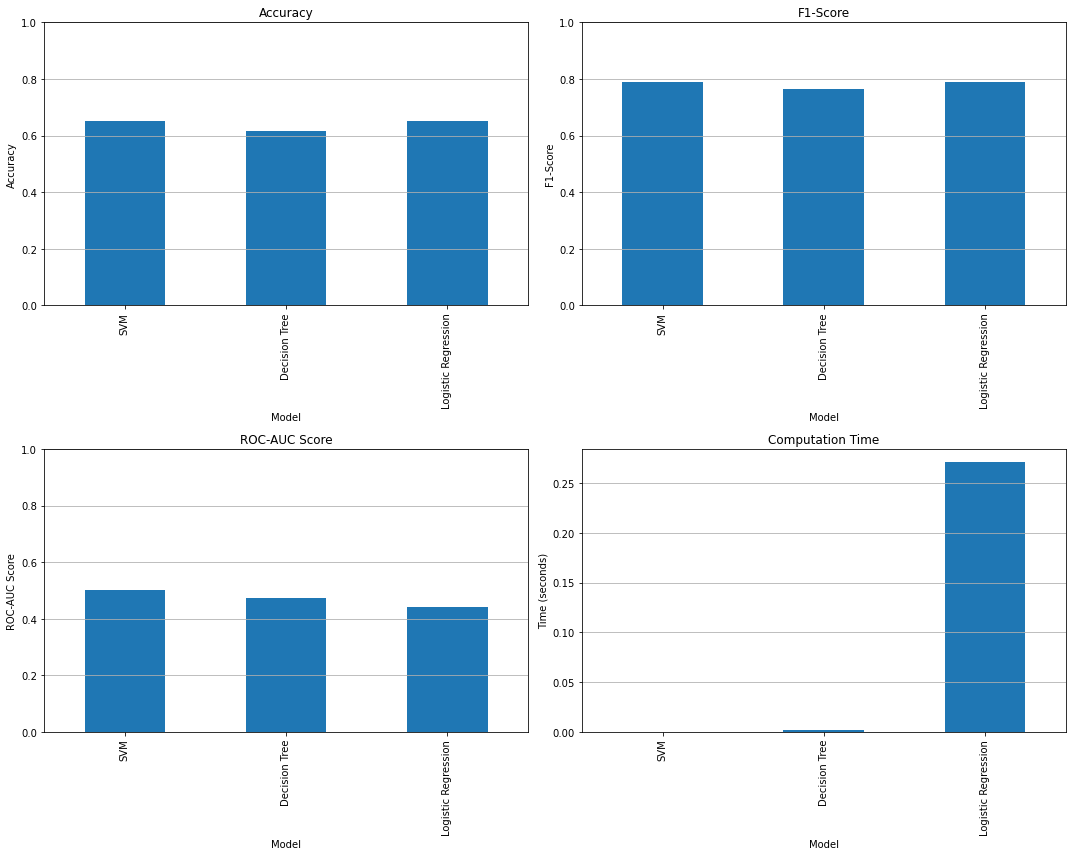

In [30]:
# Add Logistic Regression results to the dataframe
metrics_df.loc['Logistic Regression'] = [0.6504065040650406, 0.7881773399014779, 0.44011627906976747, 0.2707202434539795]

# Plotting the performance metrics with Logistic Regression included
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot for Accuracy
metrics_df['Accuracy'].plot(kind='bar', ax=axes[0, 0], ylim=(0, 1))
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].grid(axis='y')

# Plot for F1-Score
metrics_df['F1-Score'].plot(kind='bar', ax=axes[0, 1], ylim=(0, 1))
axes[0, 1].set_title('F1-Score')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].grid(axis='y')

# Plot for ROC-AUC Score
metrics_df['ROC-AUC Score'].plot(kind='bar', ax=axes[1, 0], ylim=(0, 1))
axes[1, 0].set_title('ROC-AUC Score')
axes[1, 0].set_ylabel('ROC-AUC Score')
axes[1, 0].grid(axis='y')

# Plot for Computation Time
metrics_df['Computation Time (sec)'].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Computation Time')
axes[1, 1].set_ylabel('Time (seconds)')
axes[1, 1].grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
    # The Accuracy graph illustrates that the SVM and Logistic Regression have almost identical accuracy, both slightly outperforming the Decision Tree.
    # The F1-Score graph shows that the SVM and Logistic Regression again have nearly the same F1-Score, with both models performing better than the Decision Tree.
    # The ROC-AUC Score graph suggests that all three models have relatively low ROC-AUC scores, with the Logistic Regression having the lowest among them.
    # The Computation Time graph indicates that while the SVM and Decision Tree are quite efficient, the Logistic Regression took a bit longer in computation.

In [31]:
# Reset the index for a proper display of the table
metrics_df_reset = metrics_df.reset_index()

# Display the table with SVM, Decision Tree, and Logistic Regression results
metrics_df_reset


,Model,Accuracy,F1-Score,ROC-AUC Score,Computation Time (sec)
0,SVM,0.650407,0.788177,0.500000,0.000000
1,Decision Tree,0.617886,0.763819,0.475000,0.001865
2,Logistic Regression,0.650407,0.788177,0.440116,0.270720


In [ ]:
# Performance metrics suggest that the efficient of the models reduded may be subset of features was not good to support hte results . 